In [1]:
from IPython.display import display

import os
os.chdir('C:/Users/Guy/Desktop/NewGridBot/')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
sns.set(rc={'figure.figsize':(20,10)})
from sklearn.cluster import KMeans
data = pd.read_pickle('data/data_btc_eth_ltc_sol_doge_2y.pkl')
data = data.loc['BTC/USD'].close

<Figure size 432x288 with 0 Axes>

In [2]:
sub_data = data[:data.size//2]

In [3]:
from indicators import SimpleMovingAverage, ExponentialMovingAverage
from utils import SupportResistance

In [4]:
df = pd.DataFrame({
    "data": data,
    "sma" : SimpleMovingAverage(10000, data.to_numpy()).ma,
    "ema": ExponentialMovingAverage(10000, data.to_numpy()).ma
})
df = df.loc[~np.isnan(df.sma.to_numpy())]

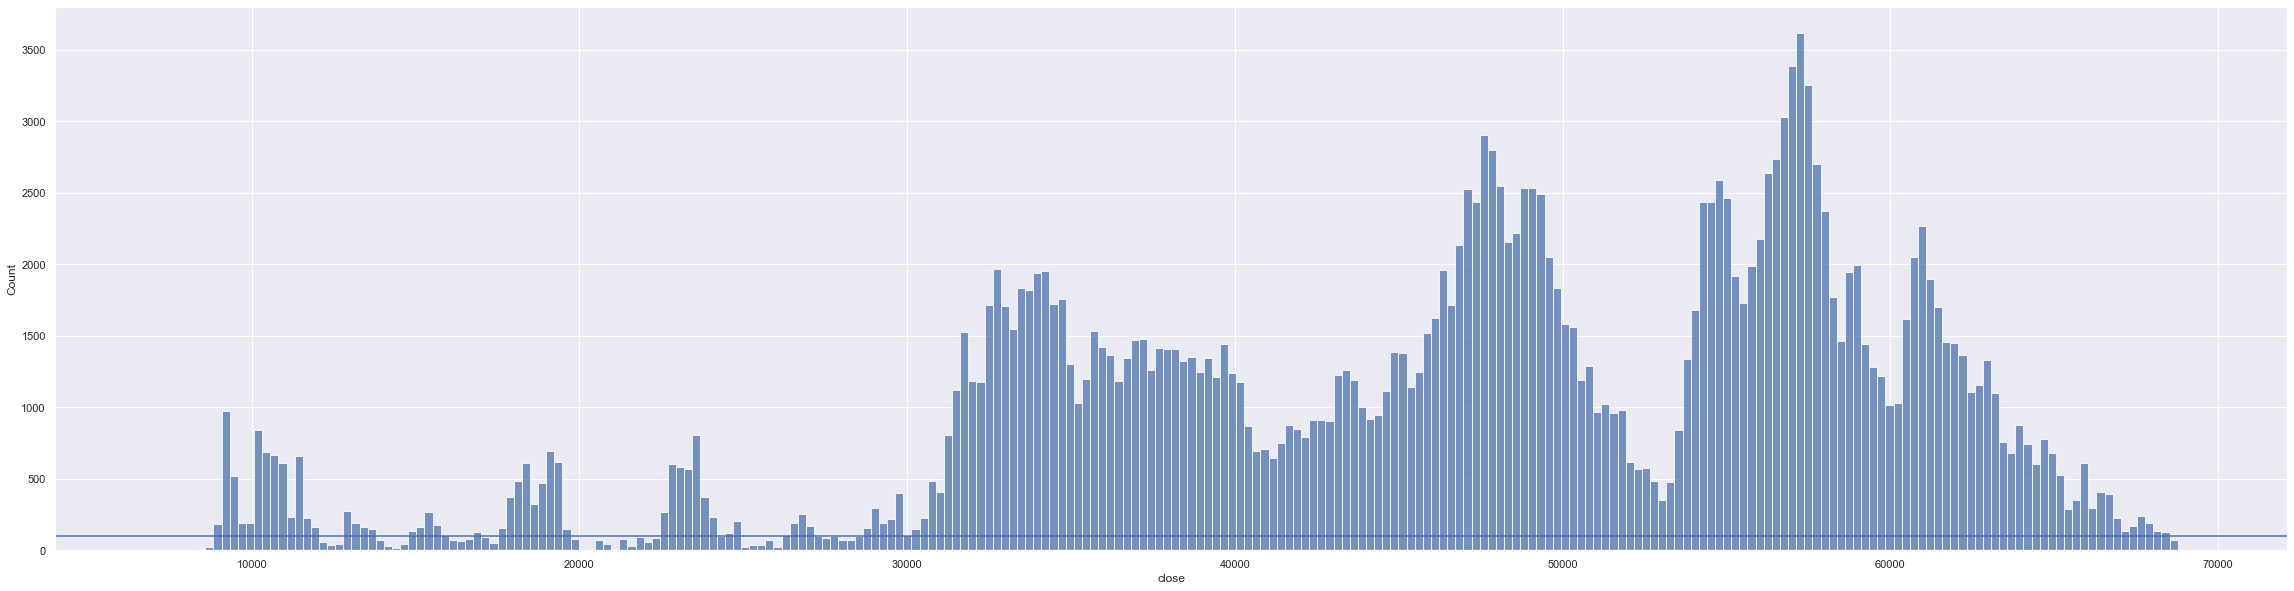

In [5]:
fig = sns.histplot(data=sub_data, bins=250)
fig.axhline(y=1000//10)

In [6]:
s_r = SupportResistance(data=sub_data.to_numpy())

<AxesSubplot:>

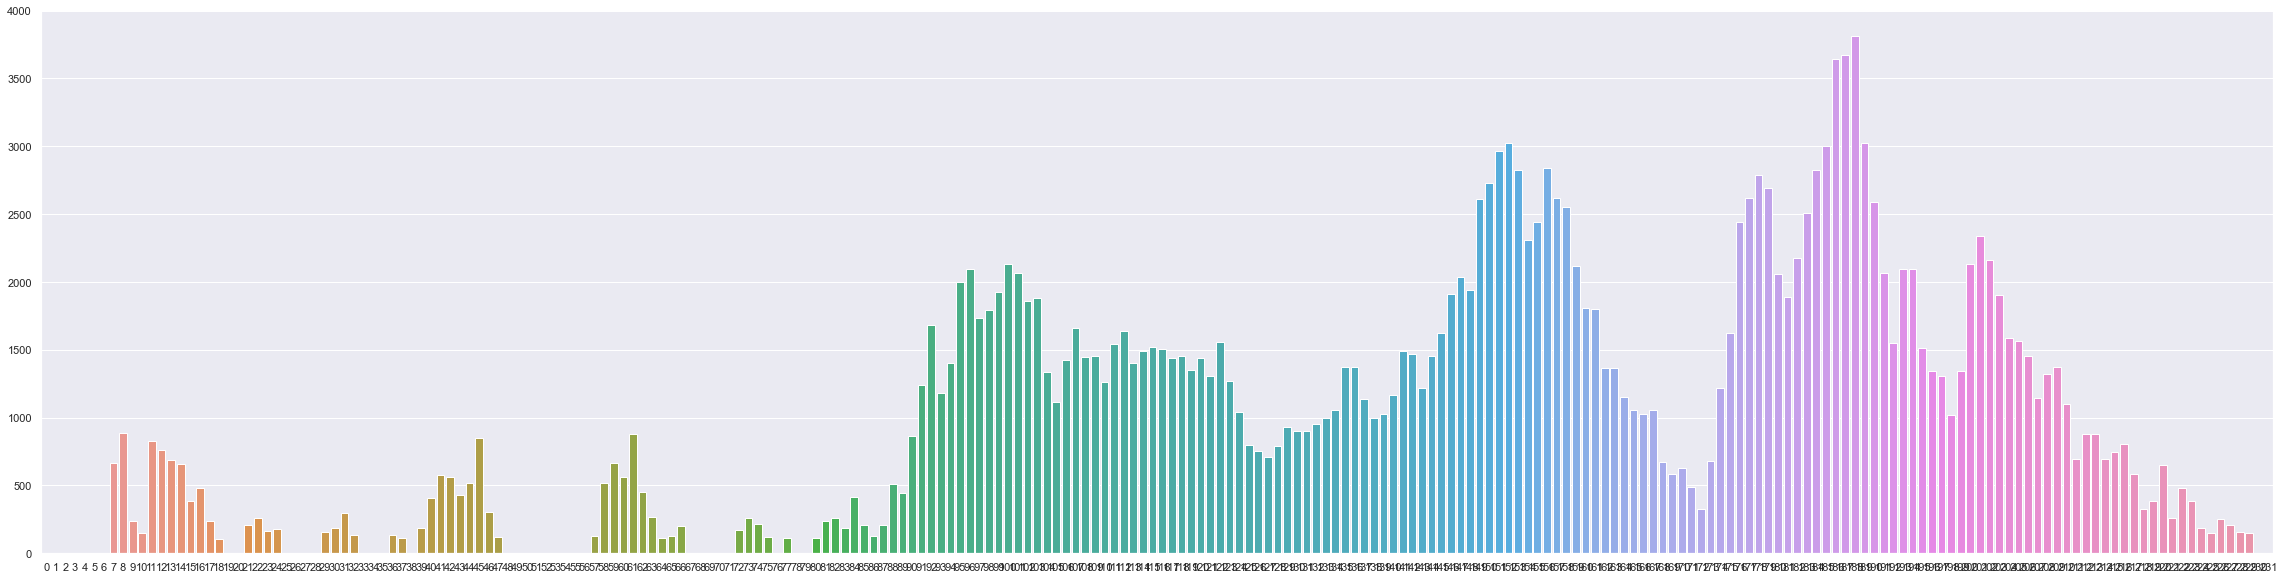

In [7]:
sns.barplot(y=s_r.hist_count_denoise, x=np.arange(s_r.hist_count.size))

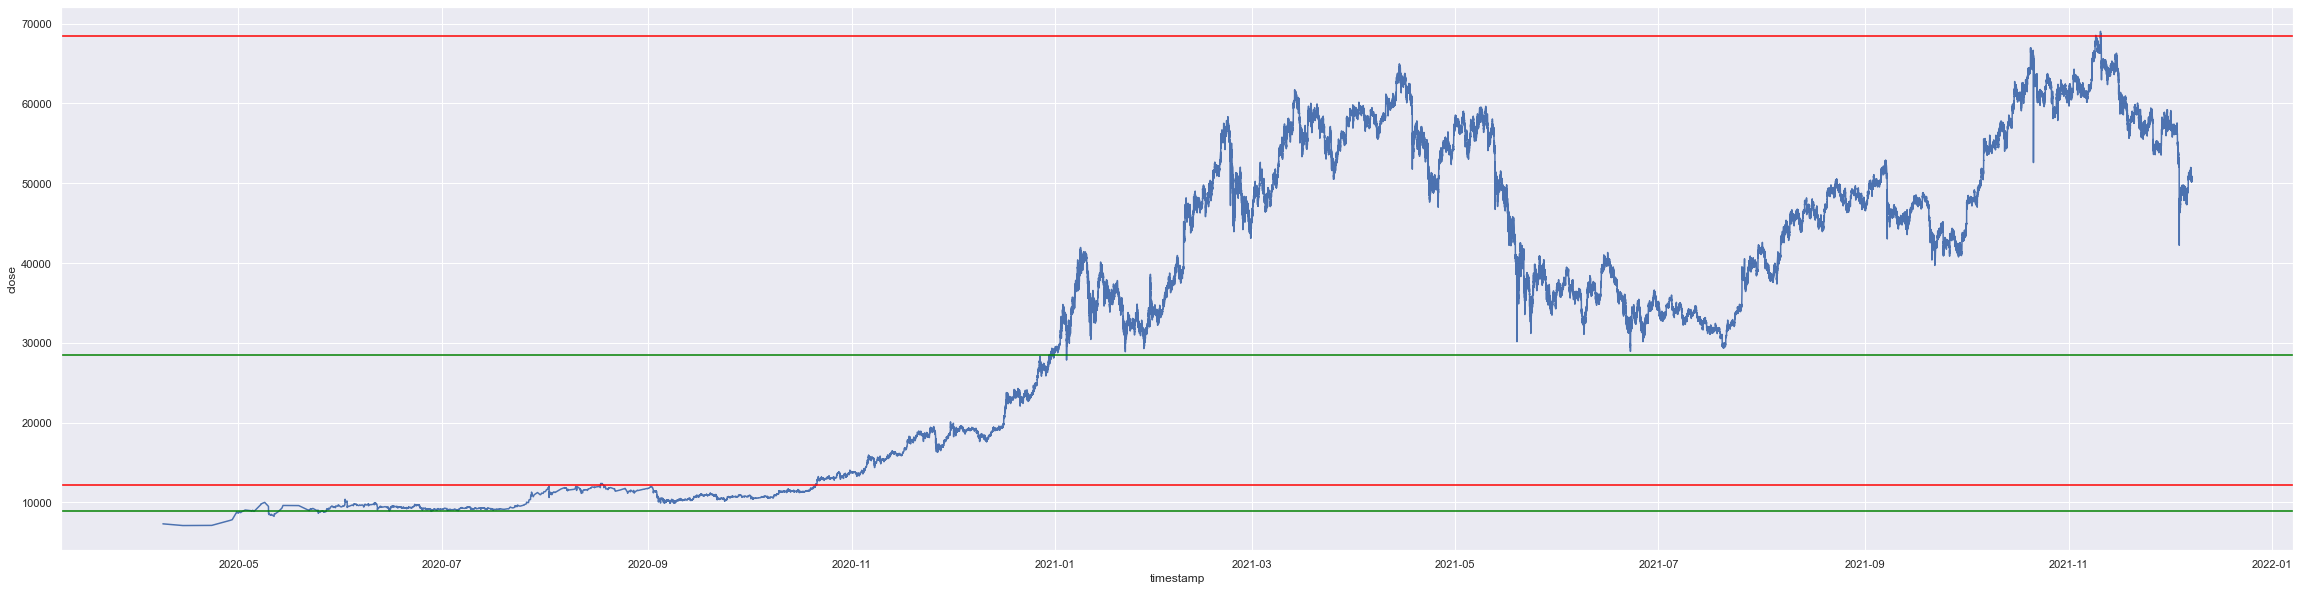

In [8]:
fig = sns.lineplot(data=sub_data)
for value in s_r.clusters_edge:
    fig.axhline(y=value[0], color="green")
    fig.axhline(y=value[1], color="red")

In [9]:
s_r.clusters_edge

array([[ 8968.18534483, 12170.7887931 ],
       [28450.68965517, 68483.23275862]])